In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
import igraph as ig

In [16]:
def Degree_distance(G, Path, l):
    td = 2
    S = []
    global N
    Dd = list(zip(np.arange(N), G.degree()))
    Dd.sort(key = lambda x: x[1])
    
    while len(S) < l:
        u= Dd.pop()[0]
        S.append(u)
        for i in range(len(Dd)-1, -1, -1):
            if Path[u][Dd[i][0]] <= td:
                Dd.remove(Dd[i])
    return S

In [17]:
def Single_discount(G, l):
    S = []
    Sd = {}
    global N
    Sd = dict(zip(np.arange(N), G.degree()))

    while len(S) < l:
        u = max(Sd, key=Sd.get)
        Sd[u] = -1
        S.append(u)
        for v in G.get_adjlist()[u]:
                Sd[v] -= 1
    return S

In [18]:
def Degree_discount(G, p, l):
    S = []
    Dd = {}
    t = {}
    global N
    Dd = dict(zip(np.arange(N), G.degree()))
    t = dict(zip(np.arange(N), np.zeros(N, int)))
        
    while len(S) < l:
        u = max(Dd, key=Dd.get)
        Dd[u] = -1
        S.append(u)
        for v in G.get_adjlist()[u]:
            t[v] += 1
            Dd[v] = G.degree()[v] - 2*t[v] - (G.degree()[v]-t[v])*t[v]*p
            if Dd[v] < 0:
                Dd[v] = 0
    return S

In [19]:
def Generalized_degree_discount(G, p, l):
    S = []
    global N
    Gdd = dict(zip(np.arange(N), G.degree()))
    t = dict(zip(np.arange(N), np.zeros(N, int)))
        
    while len(S) < l:
        u = max(Gdd, key=Gdd.get)
        Gdd[u] = -1
        S.append(u)
        NB = []
        for v in G.get_adjlist()[u]:
            NB.append(v)
            t[v] += 1
            for w in G.get_adjlist()[v]:
                NB.append(w)
    
        for v in NB:
            sumtw = 0
            for w in G.get_adjlist()[v]:
                if w not in S:
                    sumtw += t[w]
            Gdd[v] = G.degree()[v] - 2*t[v] - (G.degree()[v]-t[v])*t[v]*p + 0.5*t[v]*(t[v]-1)*p - sumtw*p
            if Gdd[v] < 0:
                Gdd[v] = 0
    return S

In [20]:
def Degree_centrality(G, l):
    S = []
    DegCentr = list(zip(np.arange(N), G.degree()))
    DegCentr.sort(key = lambda x: x[1])
    while len(S) < l:
        S.append(DegCentr.pop()[0])
    return S

def Betweenness_centrality(G, l):
    S = []
    global N
    BetwCentr = list(zip(np.arange(N), G.betweenness(directed=False, cutoff=None)))
    BetwCentr.sort(key=lambda x:x[1])
    while len(S) < l:
        S.append(BetwCentr.pop()[0])
    return S

def Closeness_centrality(G, Path, l):
    S = []
    global N
    CloseCentr = []
    for i in range(N):
        sumc = 0
        for j in range(i):
            sumc += 1/Path[i][j]
        for j in range(i+1, N):
            sumc += 1/Path[i][j]
        CloseCentr.append((i, sumc)) 
        
    CloseCentr.sort(key = lambda x :x[1])
    while len(S) < l:
        S.append(CloseCentr.pop()[0])
    return S

def Pagerank(G, l):
    S = []
    Pagerank = list(zip(np.arange(N), G.pagerank(directed=False, damping=0.85, implementation='prpack')))
    Pagerank.sort(key = lambda x: x[1])
    while len(S) < l:
        S.append(Pagerank.pop()[0])
    return S

def Coreness_centrality(G, l):
    S = []
    global N
    Coreness = G.shell_index()
    NeighCore = []
    CoreCentr = []
    for i in range(N):
        sumc = 0
        for v in G.get_adjlist()[i]:
            sumc += Coreness[v]
        NeighCore.append(sumc)
    for i in range(N):
        sumc = 0
        for v in G.get_adjlist()[i]:
            sumc += NeighCore[v]
        CoreCentr.append((i, sumc))

    CoreCentr.sort(key = lambda x: x[1])
    while len(S) < l:
        S.append(CoreCentr.pop()[0])
    return S

In [21]:
def limitedSIR(G, p, q, spreader):
    times = 50
    result = 0
    global N
    for r in range(times):
        R = 0
        I = copy.deepcopy(spreader)
        A = copy.deepcopy(G.get_adjlist())
        status = np.zeros(N, dtype=int)
        for i in I:
            status[i] = 1
        
        while len(I) > 0:
            for x in range(len(I)-1, -1, -1):
                if len(A[I[x]]) > 0:
                    v = np.random.choice(A[I[x]])
                    A[I[x]].remove(v)
                    A[v].remove(I[x])
                    if status[v] == 0 and np.random.choice(2, p=[p, 1-p]) == 0:
                        status[v] == 1
                        I.append(v)
                    if np.random.choice(2, p=[q, 1-q]) == 0:
                        R += 1
                        I.remove(I[x])
                else:
                    R += 1
                    I.remove(I[x])
        result += (R/N) * 100
    result /= times
    return result

In [22]:
def plot(x, data, xlabel, ylabel, title, legends):
    fig, ax = plt.subplots(figsize=(11, 7))
    #ax.set_title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(x, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    for i in range(len(data)):
        plt.plot(x, data[i], marker='*', mec='r', mfc='w', linewidth=2.5, markersize = 7.5)
    plt.legend(legends, loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=14)
    plt.show()

### Influence of nine methods with different fractions

In [23]:
f1 = 'C:\\Users\\ASUS\\Desktop\\Network Project\\Gnutella p2p.txt'
f2 = 'C:\\Users\\ASUS\\Desktop\\Network Project\\Enron email.txt'
G = ig.Graph.Read(f1, format = 'edges').as_undirected(mode = 'collapse')
global N, E
N, E = len(G.vs), len(G.es)
Fraction = [0.2, 0.4, .6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2]
r = 1.1
q = round(N / (2*E), 4)
p = round(r*q, 4)
l = int(Fraction[-1]/100 * N)
Path = G.shortest_paths_dijkstra(mode = 'ALL')
print('Nodes:', N, ' Edges:', E, ' p:', p, ' q:', q)

Nodes: 6301  Edges: 20777  p: 0.1668  q: 0.1516


In [ ]:
test = [367, 123, 5, 145, 353, 249, 177, 124, 127, 427, 149, 147, 144, 143, 369, 174, 148, 1245, 264, 9, 856, 179, 352, 176, 7, 266, 251, 122, 126, 1317, 146, 390, 422, 4, 762, 3, 717, 559, 424, 8, 423, 368, 125, 248, 247, 1412, 753, 924, 238, 128, 175, 121, 820, 667, 36, 754, 3849, 2020, 3459, 3693, 3213, 1739, 2779, 5452, 2374, 30, 4003, 4113, 485, 3577, 250, 3551, 4260, 5724, 3403, 366, 937, 1868, 586, 4482, 4751, 1884, 2873, 2796, 1310, 4257, 3077, 1564, 2243, 2032, 3910, 605, 3323, 3088, 665, 252, 3448, 2501, 4016, 2860, 3948, 505, 4472, 2313, 2046, 2261, 401, 3258, 1676, 4900, 2312, 421, 558, 5090, 1458, 3537, 3526, 2699, 1561, 5267, 2490, 1290, 3026, 4755, 3883, 2790]

In [25]:
spreaders = []
spreaders.append(Degree_distance(G, Path, l))
print('Degree distance complete')

spreaders.append(Single_discount(G, l))
print('Single discount complete')

spreaders.append(Degree_discount(G, p, l))
print('Degree discount complete')

spreaders.append(Generalized_degree_discount(G, p, l))
print('Generalized_degree discount complete')

spreaders.append(Degree_centrality(G, l))
print('Degree centrality complete')

spreaders.append(Betweenness_centrality(G, l))
print('Betweenness centrality complete')

spreaders.append(Closeness_centrality(G, Path, l))
print('Closeness centrality complete')

spreaders.append(Pagerank(G, l))
print('Pagerank complete')

#spreaders.append(Coreness_centrality(G, l))
spreaders.append(test)
print('Coreness centrality complete')

Degree distance complete
Single discount complete
Degree discount complete
Generalized_degree discount complete
Degree centrality complete
Betweenness centrality complete
Closeness centrality complete
Pagerank complete
Coreness centrality complete


In [31]:
data = np.zeros((len(spreaders), len(Fraction)))
for i in range(len(spreaders)):
    for j in range(len(Fraction)):
        print(i, j)
        data[i][j] = limitedSIR(G, p, q, spreaders[i][:int(N * Fraction[j]/100)])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9


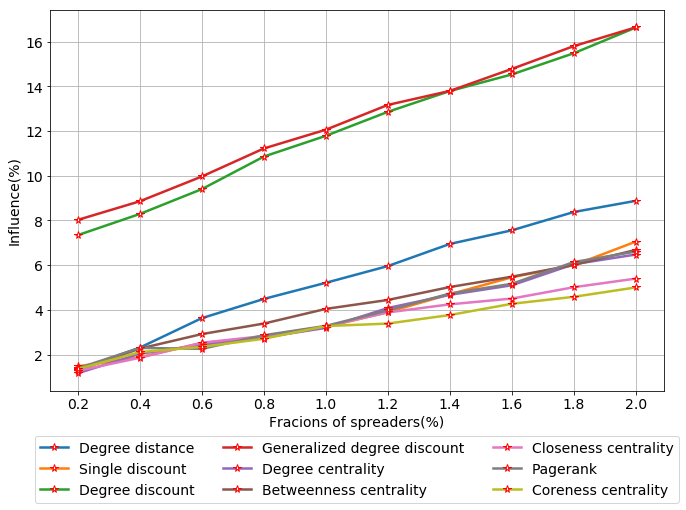

In [43]:
legends = ('Degree distance', 'Single discount', 'Degree discount', 'Generalized degree discount', 'Degree centrality',
           'Betweenness centrality', 'Closeness centrality', 'Pagerank', 'Coreness centrality')
plot(Fraction, data, 'Fracions of spreaders(%)', 'Influence(%)', 'Influence-Fractions of spreaders', legends)